## Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Constants

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/02_Training/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/02_Training/test-target.txt'

VOCAB_SIZE = 2500

## Load the Data

In [3]:
# Feature
x_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [4]:
x_test[:5]

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Calculating the Joint Probability
#### The Dot Product

In [5]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])
print('a= ',a)
print('b= ',b)

a=  [1 2 3]
b=  [0 5 4]


In [6]:
a.dot(b)

22

In [7]:
1*0 + 2*5 + 3*4

22

In [8]:
c = np.array([[0, 6], [3, 0], [5, 1]])
print('shape of c is ', c.shape)
print(c)

shape of c is  (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [9]:
print(a.dot(c))
print('shape of dot product is ', a.dot(c).shape)

[21  9]
shape of dot product is  (2,)


In [10]:
[1*0 + 2*3 + 3*5, 1*6 + 2*0 + 3*1]

[21, 9]

In [11]:
x_test.shape

(1724, 2500)

In [12]:
prob_token_spam.shape

(2500,)

In [13]:
print('shape of dor product is ', x_test.dot(prob_token_spam).shape)

shape of dor product is  (1724,)


## Set the Prior
$$ P(Spam \, | \, X) = \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)} $$

In [14]:
PROB_SPAM = 0.3116

In [15]:
np.log(prob_token_spam)

array([-4.42160946, -5.26569705, -5.00070638, ..., -9.01627007,
       -9.80472743, -9.21694076])

## Joint Porbability in Log Format

In [67]:
joint_log_spam = x_test.dot((np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM))

In [68]:
joint_log_spam

array([ -185.21724757,   -43.51502696,   -46.32908027, ...,
       -1044.31211484,   -43.91003148,  -374.38355207])

$$ P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, (1 - P(Spam))}{P(X)} $$

In [69]:
joint_log_ham = x_test.dot((np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1 - PROB_SPAM))
joint_log_ham

array([-125.39242624,  -25.41440461,  -55.28496778, ..., -157.28523192,
        -10.7650247 ,  -59.67882693])

In [70]:
joint_log_ham.size

1724

## Making Predictions
### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<center><b>OR</b></center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [71]:
prediction = joint_log_spam > joint_log_ham

In [72]:
prediction[-5:] * 1

array([0, 0, 0, 0, 0])

In [73]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

## Simplify
$$ P(X \, | \, Spam) \, P(Spam) \, \ne \,  \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)} $$

In [74]:
joint_log_spam = x_test.dot(np.log(prob_token_spam) + np.log(PROB_SPAM))
joint_log_ham = x_test.dot(np.log(prob_token_ham) + np.log(1 - PROB_SPAM))

## Model & Evaluation

### Accuracy

In [75]:
correct_doc = (y_test == prediction).sum()
print('Docs classified correctly ', correct_doc)
wrong_doc = x_test.shape[0] - correct_doc
print('Docs classified incorrectly ', wrong_doc)

Docs classified correctly  1327
Docs classified incorrectly  397


In [76]:
# Accuracy
correct_doc / len(x_test)

0.7697215777262181

In [77]:
fraction_wrong = wrong_doc / len(x_test)
print('Fraction classified incorrectly {:.2%}'.format(fraction_wrong))
print('Accuracy of the Model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly 23.03%
Accuracy of the Model is 76.97%


## Visualising the Results

In [32]:
# Chart styling info
xaxis_label = 'P(X | Spam)'
yaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

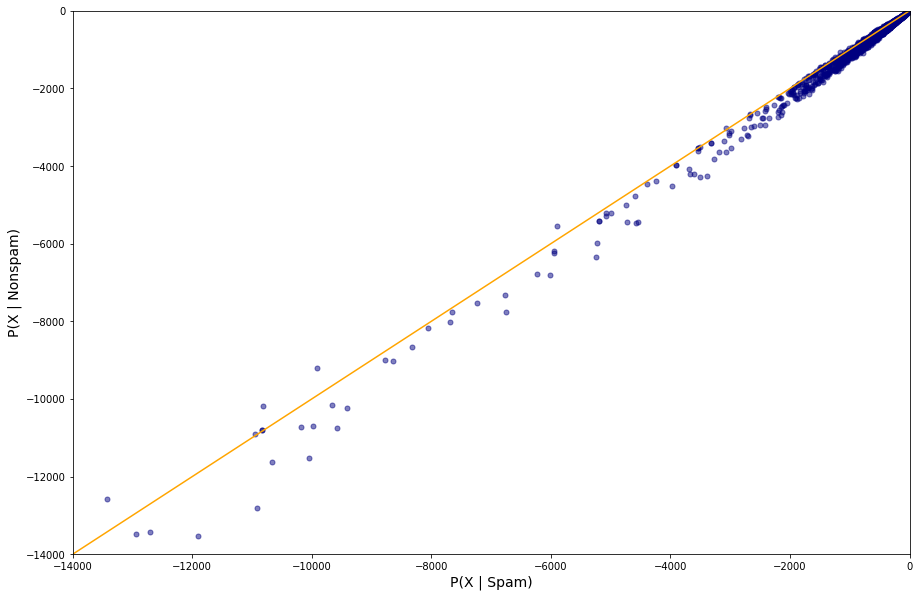

In [37]:
plt.figure(figsize=(15,10))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

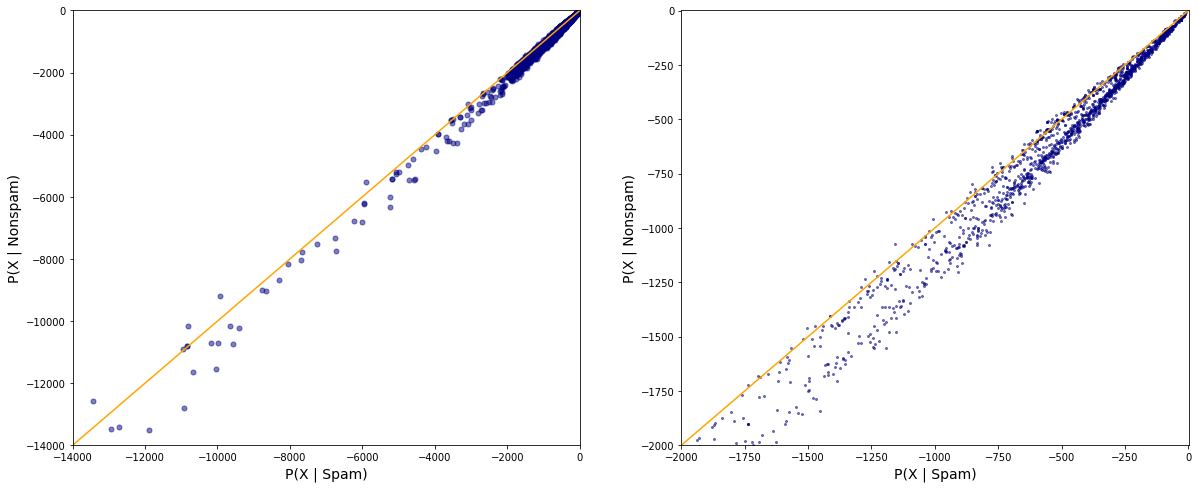

In [40]:
plt.figure(figsize=(20,8))

# Chart Nr 1
plt.subplot(1, 2, 1)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart Nr 2
plt.subplot(1, 2, 2)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=4)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [41]:
# Chart styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})

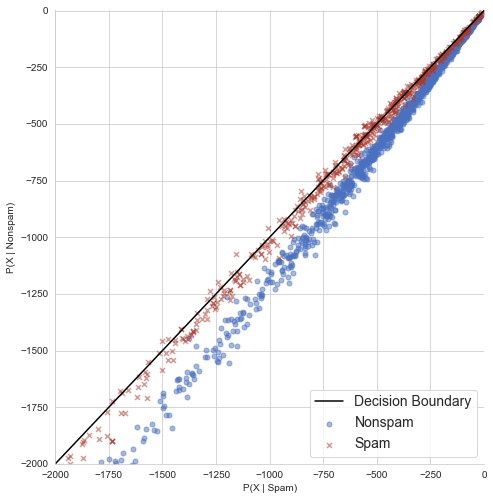

In [56]:
my_colors = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, fit_reg=False, legend=False, height=7, 
           scatter_kws={'alpha':0.5,'s':25}, hue=labels, markers=['o', 'x'], palette=my_colors)

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

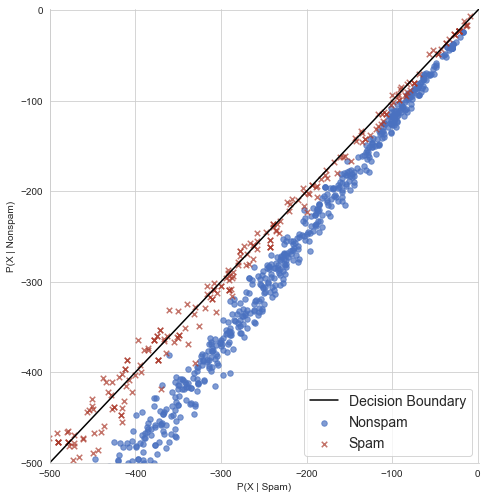

In [59]:
my_colors = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, fit_reg=False, legend=False, height=7, 
           scatter_kws={'alpha':0.7,'s':30}, hue=labels, markers=['o', 'x'], palette=my_colors)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

## False Positive & False Negaive

In [60]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1532,  192], dtype=int64))

In [62]:
true_pos = (y_test == 1) & (prediction == 1)
true_pos.sum()

192

In [63]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

0

In [64]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

397

## Recall Score

In [78]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg. sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 32.60%


## Precision Score

In [79]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.2%}'.format(precision_score))

Precision score is 100.00%


## F-Score OR F1 Score

In [80]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.49
